In [2]:
# Import packages
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
def get_sin_basis(x): 
    '''
    ---------------------
    Input:
    Output: 
    ---------------------
    '''
    y_true = np.power(np.sin(2*math.pi*x),2)
    return y_true


def add_noise(y_true, loc = 0, sd = 0.07):
    '''
    ---------------------
    Input:
    Output: 
    ---------------------
    '''
    y_obs = y_true + np.random.normal(loc, sd, y_true.shape)
    
    return(y_obs)


def get_data(n, lower, upper, sd):
    '''
    ---------------------
    Input:
    Output: 
    ---------------------
    '''
    np.random.seed(1291239)
    x = np.random.uniform(lower, upper, n)
    
    y_true = get_sin_basis(x)
    y_obs = add_noise(y_true, sd = sd)
    
    return x, y_true, y_obs


def plot_data(x, y_obs, path):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    # Close any figures currently open
    plt.clf()

    # Make grids of x and y points to plot
    x_grid = np.linspace(0, 5, 1000000)
    y_grid = np.array([get_sin_basis(example) for example in x_grid])

    # Title of the plot
    title = "True basis function vs. Noisy data points"

    # Plot the true curve and then plot the observed values
    plt.plot(x_grid, y_grid, label = "True function")
    plt.plot(x, y_obs, "r.")
    
    # Add annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    
    # Format the axes
    axes = plt.gca()
    axes.set_xlim([0,1.6])
    axes.set_ylim([0,1.6])

    
    # Display and save plot
    plt.savefig(path)

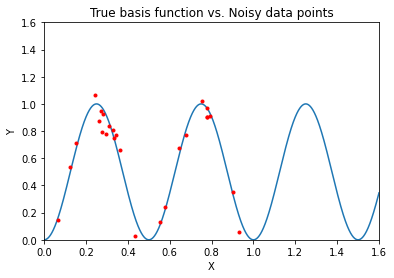

In [30]:
# Get and plot initial data
x, y_true, y_obs = get_data(30, 0, 1, 0.07)
plot_data(x, y_obs, os.path.join("..", "figs", '1_2_data.png'))

In [18]:
def get_basis(x, k):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Polynomial basis features
    ------------------------
    '''
    grid = np.meshgrid(x, np.arange(k)) 
    return np.power(grid[0], grid[1]).T


def get_sol(X, Y):
    '''
    ------------------------
    Input: Polynomial features
    Output: Least squares solution
    ------------------------
    '''
    return np.linalg.solve(X.T @ X, X.T @ Y)


def get_predictions(X, beta_hat):
    '''
    ------------------------
    Input: 
           1) Polynomial features
           2) Least squares coefficients
    Output: Predictions
    ------------------------
    '''
    return X @ beta_hat


def run_regression(k, x, y, loss_func):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    ''' 
    phi_x = get_basis(x, k)
    beta_hat = get_sol(phi_x, y)
    y_hat = get_predictions(phi_x, beta_hat)
    
    mse = loss_func(y, y_hat)
    results = {'beta_hat': beta_hat, 'y_hat': y_hat, 'mse': mse, 'degree': k}
    
    return(results)


def get_mse(Y, Y_hat):
    '''
    ------------------------
    Input: True values and predicted values
    Output: Mean squared error
    ------------------------
    '''
    return np.sum(np.power(Y-Y_hat, 2))/max(Y.shape)


def get_ln_mse(Y, Y_hat, tolerance=1e-18):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    return np.log(np.sum(np.power(Y-Y_hat,2))/max(Y.shape))

In [21]:
def run_polynomial_regression(x, y, lower = 1, upper = 18):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    results = np.array([run_regression(k, x, y, get_ln_mse) for k in range(lower, upper + 1)])
    ln_mse = np.array([result['mse'] for result in results])
    
    return results, ln_mse


def plot_results(path, title, k, results, x_lab = "X", y_lab="Y"):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    ''' 
    # Make grids for plot
    x_grid = np.linspace(-5, 5, 100000)
    x_basis = [get_basis(x_grid, degree) for degree in range(k + 1)]
    y_grid = [get_predictions(basis, results[deg]['beta_hat']) for basis, deg in zip(x_basis, range(k + 1))]
    
    # Plots
    for degree in range(k + 1):
        plt.plot(x_grid, y_grid[degree], label = str(degree))
    
    # Add annotations
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title)
    plt.legend()
    
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([-5,8])

    
    # Display and save plot
    plt.show()
    plt.savefig(path)

In [33]:
# Run polynomial regressions
lower = 1 
upper = 17
    
# Get from polynomial regression
results, ln_mse = run_polynomial_regression(x, y_obs, lower, upper)
# Show results
results[0]['beta_hat']

array([0.5075193 , 0.16361817])

In [26]:
def plot_loss(losses, highest_k, path):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    # Close any currently open plots
    plt.clf()

    # Title of the plot
    title = "Polynomial degree vs. training error"

    # Make grids of x and y points to plot
    x_grid = np.arange(1, highest_k + 1)
    
    # Plot the true curve
    plt.plot(x_grid, losses, "r.")
    
    # Add annotations
    plt.xlabel('Polynomial degree')
    plt.ylabel('Log MSE')
    plt.title(title)
    
    # Get current access
    axes = plt.gca()
    axes.set_xlim([0,20])
    axes.set_ylim([min(losses) - 0.1, max(losses) + 0.1])

    
    # Display and save plot
    plt.savefig(path)

In [27]:
# Plot results
path = os.path.join("..", "figs", '1_2_results.png')
title = "Sinusoid basis regression results"

k = 17
plot_results(path, title, k, results)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [12]:
def get_testing_data(n, lower, upper, var):
    '''
    ---------------------
    Input: Parameters needed for data
    Output: output
    ---------------------
    '''
    np.random.seed(1890)
    x = np.random.uniform(lower, upper, n)
    y_true = np.array([get_true_basis(example) for example in x])
    y = np.array([get_noisy_basis(example, var) for example in x])
    
    return x, y_true, y


def get_test_mse(x_test, y_test_true, results, k = 18):
    '''
    ---------------------
    Input: Parameters needed for data
    Output: output
    ---------------------
    '''
    # Get features
    x_basis = [get_basis(x_test, degree) for degree in range(1, k + 1)]
    y_preds = [get_predictions(basis, results[deg]['beta_hat']) for basis, deg in zip(x_basis, range(k + 1))]
    ln_mse_test = [get_ln_mse(y_test_true, y_pred) for y_pred in y_preds]
    
    return(ln_mse_test)

array([0.14003962, 0.12950491, 0.12104145, 0.02633633, 0.01686778,
       0.00653612, 0.00629768, 0.00449297, 0.00371824, 0.00343112,
       0.03448157, 0.00340923, 0.00315641, 0.00290724, 0.00277521,
       0.00299827, 0.0030014 ])

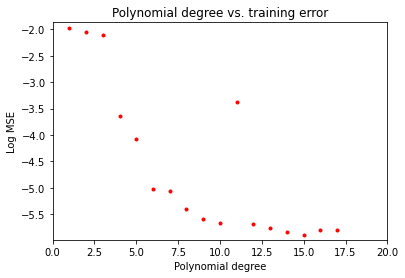

In [28]:
# Plot training loss
path = os.path.join("..", "figs", '1_2_training_loss.png')
plot_loss(ln_mse, upper, path)
ln_mse
np.exp(ln_mse)

ValueError: x and y must have same first dimension, but have shapes (17,) and (18,)

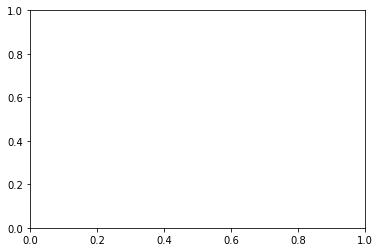

In [15]:
lower = 0
upper = 1
x_test, y_test_true, y_obs_test = get_data(1000, lower, upper, 0.07)
ln_mse_test = get_test_mse(x_test, y_test_true, results)

plot_loss(ln_mse_test, 17, path)